<h1>Functions in Julia</h1>

<p>Read more about this <a href="http://mth229.github.io/functions.html">here</a>.</p>

<p>For some problems herein, you  will need features  made  available in  the add-on <code>MTH229</code> package, which is loaded with  the following  command:</p>

In [1]:
using MTH229
using Plots
plotly()

<p>(When you run the cell to load the <code>MTH229</code> and <code>Plots</code> packages, an asterisk will appear in the label to the left of the cell: <code>In &#91;*&#93;</code>. When the packages have been loaded, which can take awhile, the asterisk will turn into a number.)</p>

<hr />

<p>For the impatient:</p>

<p>A <em>function</em> in mathematics is <a href="http://tinyurl.com/c2rwqyb">defined</a> as "a relation between a set of inputs and a set of permissible outputs with the property that each input is related to exactly one output." That is a general definition. Specialized to mathematical functions of one real variable returning a real value (univariate functions), we can define a function in terms of a rule–-what happens to $x$ to produce $y$, such as this one which squares $x$ then subtracts $2$:</p>


$$
f(x) = x^2 - 2.
$$


<p>The <strong>domain</strong> of a function is the set of all permissible values for $x$, in this example this is all $x$, but this need not be the case either due to the rule not being defined for some $x$ or a more explicit restriction, such as $x \geq 0$. The <strong>range</strong> is the set of all possible outputs. Written in set notation, this is $\{f(x): x \in \text{ the domain }\}$.</p>

<p>Mathematically, we evaluate or <strong>call</strong> a function with the notation $f(2)$ or $f(3)$, say.</p>

<p>Mathematically we might refer to the function by its name, $f$, or its values such as $f(2)$ or $f(\pi)$.</p>

<p>In <code>Julia</code> basic mathematical functions are defined and used with the <em>exact</em> same notation, save for accommodations in translating math to <code>Julia</code>.</p>

<p>For example, this command creates a function <code>f</code>:</p>

In [1]:
f(x) = x^2 - 2

f (generic function with 1 method)

<p>Unlike an expression, the value <code>x</code> in the definition of <code>f&#40;x&#41;</code> does not need to be defined until the function is actually called. As with math, this variable name need not be <code>x</code> – it could be <code>t</code>, <code>y</code>, <code>theta</code>, or any other valid name.</p>

<p>We <em>call</em> <code>f</code> for the given value using the same <code>f&#40;x&#41;</code> notation. For example, finding our <code>f</code> at the value of <code>2</code> is done with:</p>

In [1]:
f(2)

2

<p>That is, as with typical mathematical notation, the function is "called" by passing a value to it with parentheses.</p>

<p>Within a cell, we can evaluate one or more values by using commas to separate them:</p>

In [1]:
f(1), f(2), f(3)

(-1, 2, 7)

<p>The function name refers to the function object:</p>

In [1]:
f

f (generic function with 1 method)

<p>Don't worry about the words "generic" and "method", but be aware that because of this once you have defined a name as a variable it can not be re-purposed as a <em>generic</em> function name and vice versa. (In the common first case, read the error message, it will say something like: <code>ERROR: cannot define function a; it already has a value</code>.)</p>

<p>The "domain" of a <code>Julia</code> function is similar in meaning to its mathematical counterpart. <code>Julia</code> may respond with different values, such as <code>Inf</code>, for infinity; <code>NaN</code>, when an expression is indeterminate; or it may throw an error, typically a <code>DomainError</code>:</p>

In [1]:
f(x) = sqrt(x)/(x*(1-x))
f(1), f(0)

(Inf, NaN)

<p>and an error with:</p>

In [1]:
f(-1)

DomainError(-1.0, "sqrt will only return a complex result if called with a complex argument. Try sqrt(Complex(x)).")


<p>Functions can be more complicated than the "one-liners" illustrated. In that case, a multiline form is available:</p>

In [1]:
function fn_name(args...)
  body
end

<p>The keyword <code>function</code> indicates this is a function whose name is given in the definition. Within the body, the last expression evaluated is the output, unless a <code>return</code> statement is used.</p>

<hr />

<p>For basic uses of functions–-90 percent of the uses in this class–-the above covers what you need to know about functions.</p>

<h2>Cases</h2>

<p>Some functions are defined in terms of cases. For example, a cell phone plan might depend on the data used through:</p>

<blockquote>
<p>The amount is 35 dollars for the first 9 Gb  of data, and 10 dollars more for each <em>additional</em> Gb of data.</p>
</blockquote>

<p>This function has two cases to consider: one if the data is less than 9 Gb and the other when it is more.</p>

<p>In a math class we would write this as:</p>


$$
cost(data) = \begin{cases} 
35.0,                   & data \leq 9.0 \\ 
35.0+10.0*(data-9.0), & \text{otherwise.} 
\end{cases}
$$


<p>How to write this in <code>Julia</code>?</p>

<p>The ternary operator <code>predicate ? expression1 : expression2</code> has three pieces: a predicate question, such as <code>x &lt; 10</code> and two expressions, the first is evaluated if the predicate is <code>true</code> and the second if the predicate is <code>false</code>. Using the ternary operator, simple case-like functions can be defined in one line.</p>

<p>For example, the above can be defined in <code>Julia</code> with:</p>

In [1]:
cost(data) = data <= 9.0 ? 35.00 : 35.00 + 10.00 * (data - 9.0)

cost (generic function with 1 method)

<p>So, three pieces: <strong>first</strong>, you ask a question. <strong>Second</strong>, what should the function do if the answer is 'yes'? <strong>Third</strong>, what should the function do if the answer is 'no'?</p>

<h2>Composition</h2>

<p>Composition of functions is a useful means to break complicated problems into easier to solve ones. The math notation is typically $f(g(x))$ and in <code>Julia</code> this is no different.</p>

<h2>Functions may need more than one argument</h2>

<p>In <code>Julia</code> some functions require more than one argument. There are two ways that a function can distinguish between arguments:</p>

<p><strong>Using position</strong>. A typical case is the function expressing the $\log$ of $x$ base $b$. The function must have both a position to pass in values for either $x$ or $b$. In <code>Julia</code> the function is written <code>log&#40;b, x&#41;</code>:</p>

In [1]:
b, x = 5, 100
a = log(b, x)
b^a - x  # verify, is this close to 0?

8.526512829121202e-14

<p>(This also shows that <code>Julia</code> can have the same name for <strong>different</strong> functions, as <code>log&#40;x&#41;</code> does the logarithm base $e$ and takes only 1 argument.)</p>

<p><strong>Using keyword names</strong>. Some arguments can be designated by a "keyword", which can have default values. This is common in general, but not so much used within these notes. This style provides a natural means to pass <em>parameters</em> to a function.</p>

<p>Plotting is where we will find the most usage. Keywords are used for adjustments, such as to the line style or color. Here is a mathematical example from the theory of <a href="https://en.wikipedia.org/wiki/Wavelet">wavelets</a>. </p>

<p>Define <code>mother</code> by</p>

In [1]:
mother(x) = (sin(2*pi*x) - sin(pi*x))/(pi*x)

mother (generic function with 1 method)

<p>This function is <em>scaled</em> and <em>shifted</em> in application. To keep track of the scale (by <code>a</code>) and the shift (by <code>b</code>) we might define a function that allows these to be passed as <em>parameters</em></p>

In [1]:
child(x; a=1, b=0) = mother((x-b)/a) / sqrt(a)

child (generic function with 1 method)

<p>This would then be called like:</p>

In [1]:
child(1/2)

-0.6366197723675813

<p>to reference the <em>default</em> parameters (which align with <code>mother</code>) or with other parameters, e.g.:</p>

In [1]:
child(1/1, a = 2, b = 1)

NaN

<h2>Functions can be used as arguments to other functions:</h2>

<p>Calculus has three main operations: The limit of a <em>function</em>, the derivative of a <em>function</em>, and the integral of a <em>function</em>.  These operations take a function and compute some value. For limits this value is a number, for derivatives this value is another function. In <code>Julia</code> we will use functions to implement each.</p>

<p>Using <code>Julia</code> operations on functions are just functions where the <em>arguments</em> are themselves functions and, <em>possibly</em>, the return value is also a function.</p>

<p>The first example we will encounter is related to plotting. The details come another day, but here is the pattern to make a plot (assuming the <code>MTH229</code> package and the <code>Plots</code> packages have been loaded):</p>

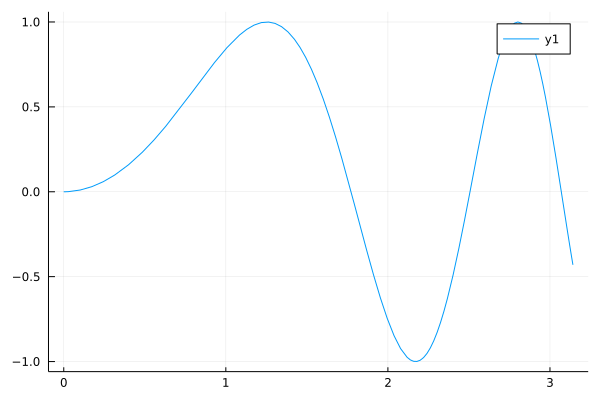

In [1]:
f(x) = sin(x^2)
plot(f, 0, pi)

<p>The first argument to <code>plot</code> is a function object–not a function call, as in <code>f&#40;x&#41;</code>, the second and third describe an interval to plot over. This will be a typical pattern: <code>someaction&#40;f, arguments...&#41;</code>.</p>

<hr />